<img src="https://i.pinimg.com/originals/7e/f4/60/7ef46049d95ee7d5fa19581a36b02d2e.gif">


Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age.

Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or alre
ady established disease) need early detection and management wherein a machine learning model can be of great help

# Import the Needed Libraries





In [ ]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
from plotly import tools
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.model_selection import train_test_split, StratifiedKFold
import plotly.figure_factory as ff
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier #For running Random forest classifier

# Reading the Dataset

In [ ]:
dataset = pd.read_csv("/content/heart.csv")

print("Number of rows in the dataset: {}".format(dataset.shape[0]))
print("Number of cols in the dataset: {}".format(dataset.shape[1]))

Number of rows in the dataset: 918
Number of cols in the dataset: 12


# Exploring the Data

In [ ]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dataset.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
dataset.shape

(918, 12)

In [ ]:
dataset.size

11016

# About the Data

**Attribute Information:**
* **Age:** age of the patient [years]
* **Sex:** sex of the patient [M: Male, F: Female]
* **ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* **RestingBP:** resting blood pressure [mm Hg]
* **Cholesterol:** serum cholesterol [mm/dl]
* **FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* **RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]
* **ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]
* **Oldpeak:** oldpeak = ST [Numeric value measured in depression]
* **ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* **HeartDisease:** output class [1: heart disease, 0: Normal]

In [ ]:
# Getting the data types
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## As we can see the string data in the dataset is in the form of object, we need to convert it back to string to work on it



In [ ]:
string_col = dataset.select_dtypes(include="object").columns
dataset[string_col]=dataset[string_col].astype("string")

In [ ]:
dataset.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

## Getting the Columns



In [ ]:
string_col=dataset.select_dtypes("string").columns.to_list()

num_col=dataset.columns.to_list()
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# Exploratory Data Analysis


<img src="https://media4.giphy.com/media/xT9C25UNTwfZuk85WP/200.gif">

## Why do we need this ?

Out Come of EDA is given as below : 

- Understanding the given dataset and helps clean up the given dataset.
- It gives you a clear picture of the features and the relationships between them.
- Providing guidelines for essential variables and leaving behind/removing non-essential variables.
- Handling Missing values or human error.
- Identifying outliers.
- EDA process would be maximizing insights of a dataset.
- This process is time-consuming but very effective,

## Correlation Matrix (Heatmap)
Its necessary to remove correlated variables to improve your model.
We can find correlations using pandas ".corr()" function and can visualize the correlation matrix using plotly express.
- Lighter shades represents positive correlation
- Darker shades represents negative correlation

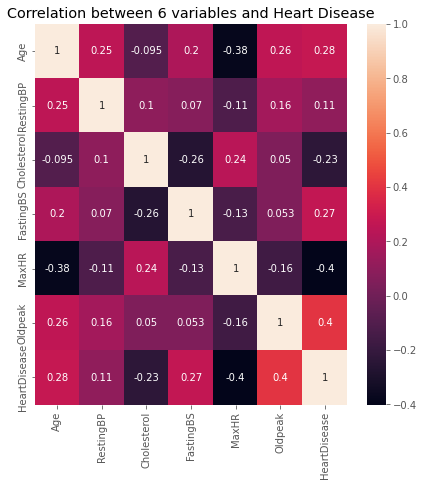

In [ ]:
cor=dataset.corr()
plt.figure(figsize=(7,7))
sns.heatmap(cor, annot=True);
plt.title('Correlation between 6 variables and Heart Disease');

> Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation with "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

In [ ]:
# Shows the Distribution of Heart Diseases with respect to male and female
fig=px.histogram(dataset, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=dataset.columns,
                 color_discrete_sequence=['#383838',"#700000"],
                 title="Distribution of Heart Diseases",
                 barmode="group")

fig.show()

In [ ]:
# Shows the Distribution of Gender (Male or Female)
colors = px.colors.cyclical.Edge_r
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = dataset['Sex'].value_counts(),
                      x = dataset['Sex'].value_counts().index, 
                      text=dataset['Sex'].value_counts(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=dataset['Sex'].value_counts().keys(),
                             values=dataset['Sex'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,800])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#F8F8F8',
                    plot_bgcolor= '#F5F5F5',
                    title=dict(text = "Gender Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [ ]:
# Shows the Distribution of Chest pain type
colors = px.colors.cyclical.Edge_r
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = dataset['ChestPainType'].value_counts(), 
                      x = dataset['ChestPainType'].value_counts().index, 
                      text=dataset['ChestPainType'].value_counts(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=dataset['ChestPainType'].value_counts().keys(),
                             values=dataset['ChestPainType'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,530])

#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#F8F8F8',
                    plot_bgcolor= '#F5F5F5',
                    title=dict(text = "ChestPainType Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [ ]:
# Shows the Distribution of Fasting Blood Sugar
colors = px.colors.cyclical.Edge_r
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = dataset['FastingBS'].value_counts(), 
                      x = dataset['FastingBS'].value_counts().index, 
                      text=dataset['FastingBS'].value_counts(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=dataset['FastingBS'].value_counts().keys(),
                             values=dataset['FastingBS'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,800])

#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#F8F8F8',
                    plot_bgcolor= '#F5F5F5',
                    title=dict(text = "FastingBS Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [ ]:
# Shows the Distribution of Resting ECG
colors = px.colors.cyclical.Edge_r
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = dataset['RestingECG'].value_counts(), 
                      x = dataset['RestingECG'].value_counts().index, 
                      text=dataset['RestingECG'].value_counts(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=dataset['RestingECG'].value_counts().keys(),
                             values=dataset['RestingECG'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,600])

#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#F8F8F8',
                    plot_bgcolor= '#F5F5F5',
                    title=dict(text = "RestingECG Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [ ]:
# Shows the Distribution of Exercise-induced angina	
colors = px.colors.cyclical.Edge_r
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = dataset['ExerciseAngina'].value_counts(), 
                      x = dataset['ExerciseAngina'].value_counts().index, 
                      text=dataset['ExerciseAngina'].value_counts(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=dataset['ExerciseAngina'].value_counts().keys(),
                             values=dataset['ExerciseAngina'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,600])

#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#F8F8F8',
                    plot_bgcolor= '#F5F5F5',
                    title=dict(text = "ExerciseAngina Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [ ]:
# Shows the Distribution of the slope of the peak exercise ST segment 
colors = px.colors.cyclical.Edge_r
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = dataset['ST_Slope'].value_counts(), 
                      x = dataset['ST_Slope'].value_counts().index, 
                      text=dataset['ST_Slope'].value_counts(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=dataset['ST_Slope'].value_counts().keys(),
                             values=dataset['ST_Slope'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,500])

#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#F8F8F8',
                    plot_bgcolor= '#F5F5F5',
                    title=dict(text = "ST_Slope Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [ ]:
# Shows the Distribution of the Heart Disease(output class [1: heart disease, 0: Normal])
colors = px.colors.cyclical.Edge_r
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = dataset['HeartDisease'].value_counts(), 
                      x = dataset['HeartDisease'].value_counts().index, 
                      text=dataset['HeartDisease'].value_counts(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=dataset['HeartDisease'].value_counts().keys(),
                             values=dataset['HeartDisease'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,550])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#F8F8F8',
                    plot_bgcolor= '#F5F5F5',
                    title=dict(text = "HeartDisease Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

## Showing the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots using the `pairplot()` function.

[]

<Figure size 1080x720 with 0 Axes>

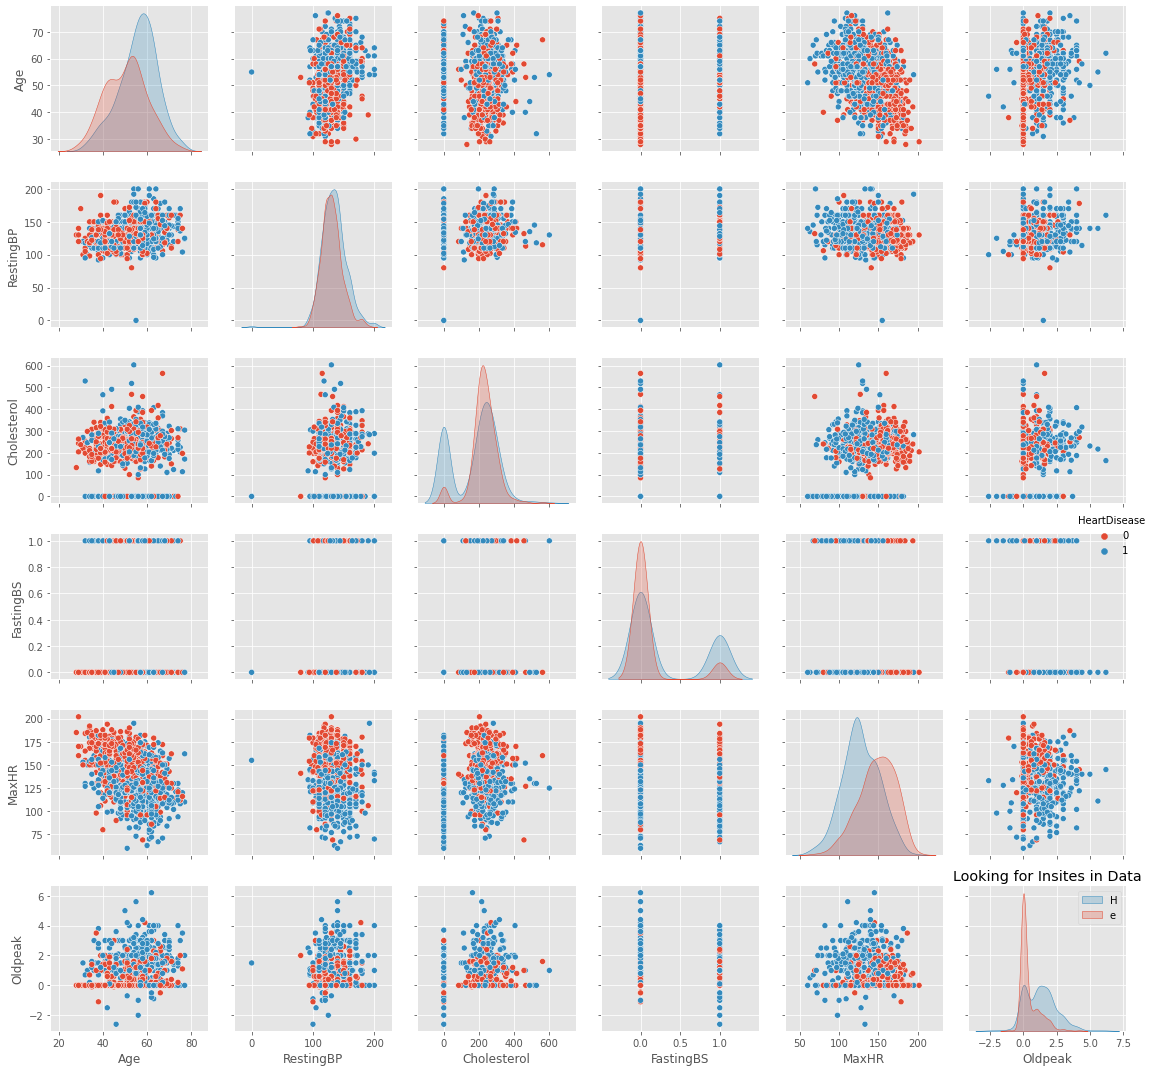

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(dataset,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

> To check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. using Kernel density estimate (kde) for plotting the shape of a distribution.

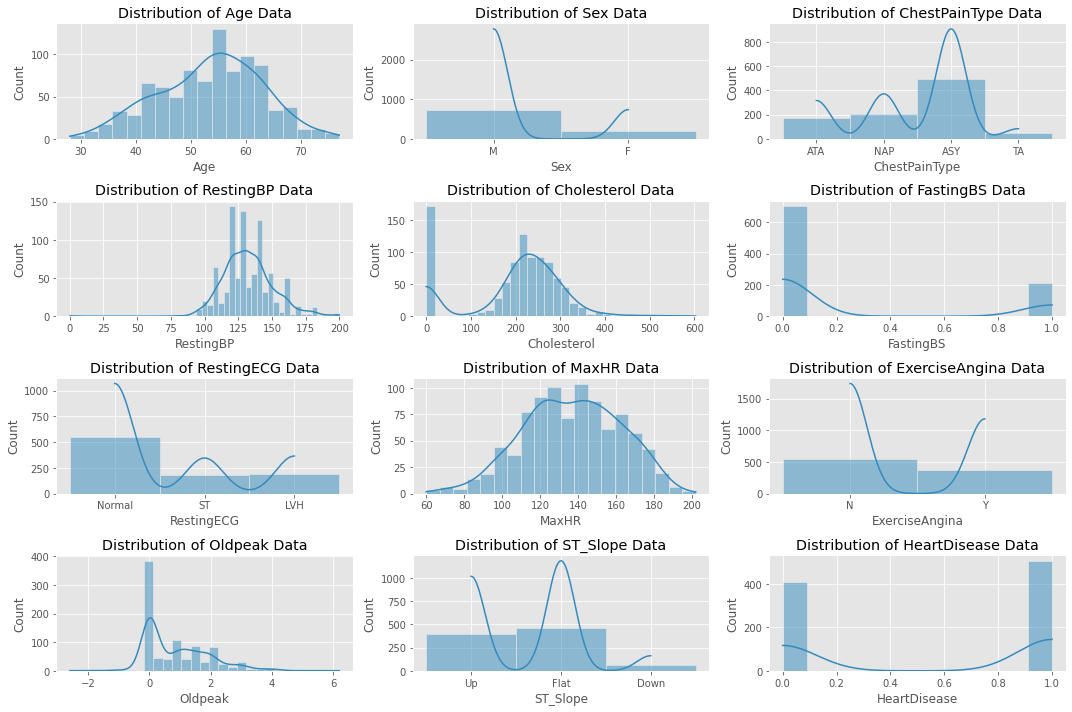

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(dataset.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(dataset[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

# Data Pre-processing

1. Handling Null Values
2. Handling Categorical Variables

## Handling Null Values

There are usually few null or NaN values in any dataset. It doesn’t really matter whether it is a regression, classification or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.

In [ ]:
# Checking for Type of data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [ ]:
# Checking for NULLs in the data

dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

> we can see our data does not have any null values but in case we have missing values, we can remove the data as well (narrowing the search interval).





## Handling Categorical Variables

In [ ]:
dataset[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(dataset[col].value_counts())

The distribution of categorical valeus in the Sex is : 
M    725
F    193
Name: Sex, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
N    547
Y    371
Name: ExerciseAngina, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: Int64


In [ ]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding 
# which will be used with Tree Based Algorthms
dataset_tree = dataset.apply(LabelEncoder().fit_transform)
dataset_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


We can use this directly in many tree-based models:
- Decision trees
- Random forest
- Extra Trees
- Or any kind of boosted trees model(e.g. GBM)
    
This type of encoding cannot be used in linear models, support vector machines or neural networks as they expect data to be normalized (or standardized). For these types of models, we can binarize the data like this: 

In [ ]:
## Creating one hot encoded features for working with non tree based algorithms 
dataset_nontree=pd.get_dummies(dataset,columns=string_col,drop_first=False)
dataset_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
# Getting the target column at the end
target="HeartDisease"
y=dataset_nontree[target].values
dataset_nontree.drop("HeartDisease",axis=1,inplace=True)
dataset_nontree=pd.concat([dataset_nontree,dataset[target]], axis=1)
dataset_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


#Training the Model

##Non-tree based algorithm
We need to choose the best Kernel according to our need. 
* The linear kernel is mostly preferred for text classification problems as it performs well for large datasets.

* Rbf kernel is a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.


###Using the SVM(Support Vector Machines) - Linear Kernel

In [ ]:
from sklearn.svm import SVC
acc_svm=[]
kf=StratifiedKFold(n_splits=5)
feature_col_nontree=dataset_nontree.columns.to_list()
feature_col_nontree.remove(target)
for fold , (trn_,val_) in enumerate(kf.split(X=dataset_nontree,y=y)):
    
    X_train=dataset_nontree.loc[trn_,feature_col_nontree]
    y_train=dataset_nontree.loc[trn_,target]
    
    X_valid=dataset_nontree.loc[val_,feature_col_nontree]
    y_valid=dataset_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        82
           1       0.92      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 1 : 0.8690817790530847
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83  

###Using K-nearest Neighbors (KNN) - Rbf Kernel

The optimal K value usually found is the square root of N, where N is the total number of samples

K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples.

When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1.

K is classified by a plurality poll of its neighbors.

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        59
           1       0.92      0.92      0.92        73

    accuracy                           0.91       132
   macro avg       0.91      0.91      0.91       132
weighted avg       0.91      0.91      0.91       132

The accuracy for 1 : 0.9080566519619225
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        59
           1       0.92      0.81      0.86        72

    accuracy                           0.85       131
   macro avg       0.86      0.86      0.85       131
weighted avg       0.86      0.85      0.86       131

The accuracy for 2 : 0.8604048964218456
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.93      0.93      0.93        72

    accuracy                           0.92  

Text(0, 0.5, 'Error Rate')

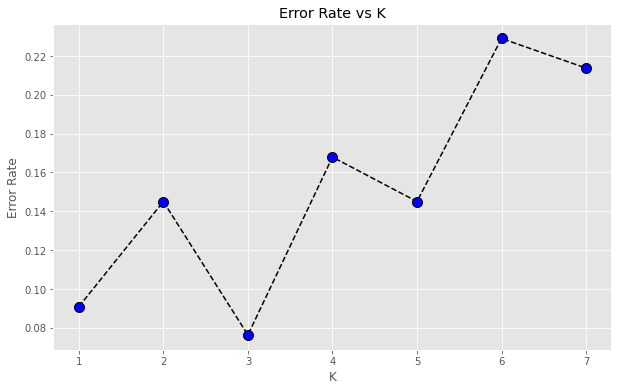

In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

feature_col_nontree=dataset_nontree.columns.to_list()
feature_col_nontree.remove(target) #The target is the HeartDisease
error_rate= []
kf=model_selection.StratifiedKFold(n_splits=7)
for fold , (trn_,val_) in enumerate(kf.split(X=dataset_nontree,y=y)):
    
    X_train=dataset_nontree.loc[trn_,feature_col_nontree]
    y_train=dataset_nontree.loc[trn_,target]
    
    X_valid=dataset_nontree.loc[val_,feature_col_nontree]
    y_valid=dataset_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    knn=KNeighborsClassifier(n_neighbors=31)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_valid)
    error_rate.append(np.mean(y_pred != y_valid))

    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass
plt.figure(figsize = (10,6))
plt.plot(range(1,8), error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='blue',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Tree Based algorithms -- Using Random Forest Classifier


In [ ]:
feature_col_tree=dataset_tree.columns.to_list()
feature_col_tree.remove(target)

In [ ]:
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=3)
for fold , (trn_,val_) in enumerate(kf.split(X=dataset_tree,y=y)):
    
    X_train=dataset_tree.loc[trn_,feature_col_tree]
    y_train=dataset_tree.loc[trn_,target]
    
    X_valid=dataset_tree.loc[val_,feature_col_tree]
    y_valid=dataset_tree.loc[val_,target]
    
    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       137
           1       0.92      0.88      0.90       169

    accuracy                           0.89       306
   macro avg       0.89      0.89      0.89       306
weighted avg       0.89      0.89      0.89       306

The accuracy for 1 : 0.8904245670107545
The fold is : 1 : 
              precision    recall  f1-score   support

           0       1.00      0.72      0.83       137
           1       0.81      1.00      0.90       169

    accuracy                           0.87       306
   macro avg       0.91      0.86      0.87       306
weighted avg       0.90      0.87      0.87       306

The accuracy for 2 : 0.8576642335766423
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       136
           1       0.83      0.75      0.79       170

    accuracy                           0.77  

##Feature Importance

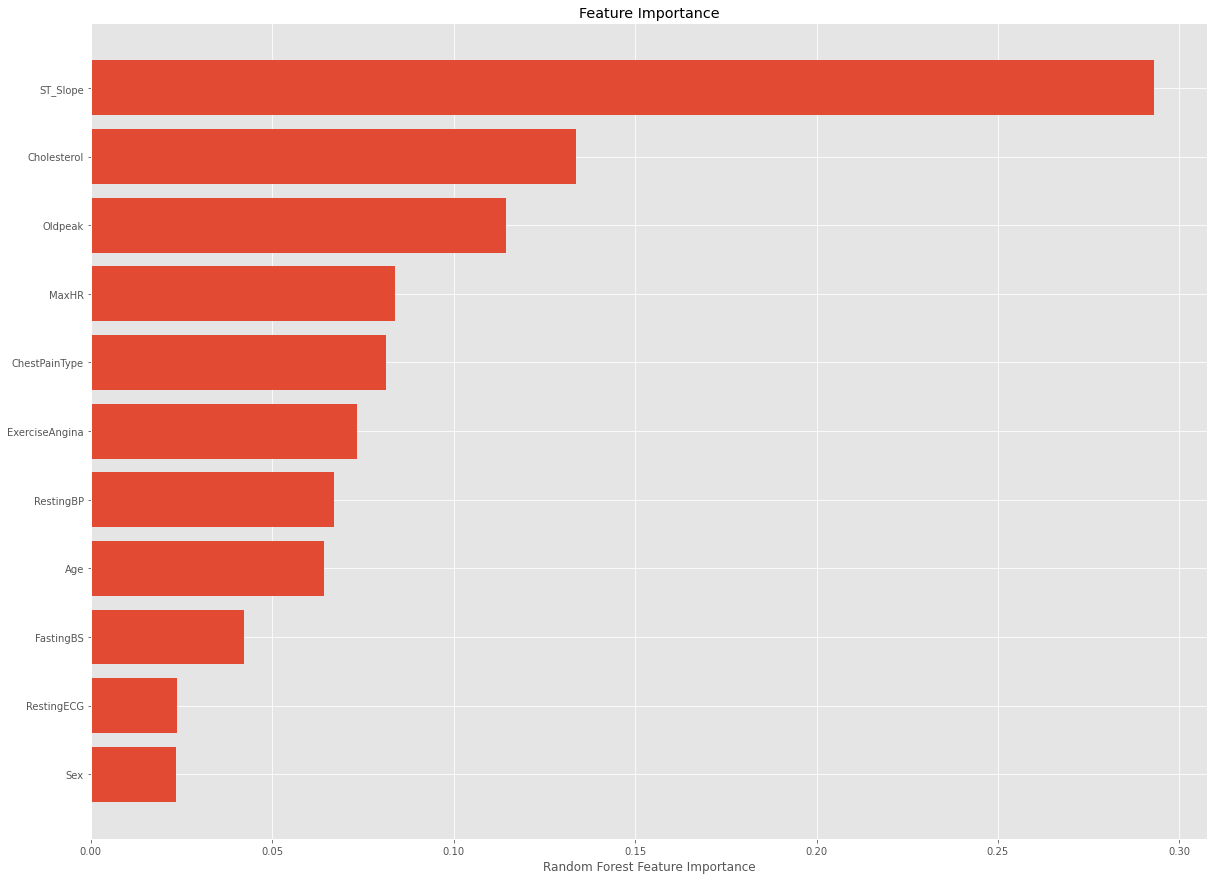

In [ ]:
# Checking Feature importance 
plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.show()